In [2]:
import pandas as pd
import numpy as np
import torch

In [3]:
# cuda確認
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("cuda")
else:
    device = torch.device("cpu")
    print("cpu")

cuda


In [4]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [5]:
!nvidia-smi

Sun Jul 30 17:03:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 4000 SFF Ada ...  WDDM  | 00000000:01:00.0  On |                  Off |
| 30%   37C    P8               9W /  70W |   2403MiB / 20475MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
summary_df = pd.read_csv("../inputs/summaries_train.csv")
prompt_df = pd.read_csv("../inputs/prompts_train.csv")

In [8]:
summary_df

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [9]:
prompt_df

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


<Axes: >

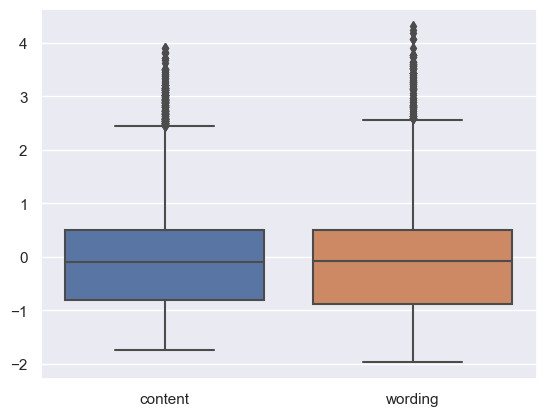

In [10]:
# 目的変数の状態
sns.boxplot(summary_df[["content", "wording"]])

<Axes: xlabel='content', ylabel='wording'>

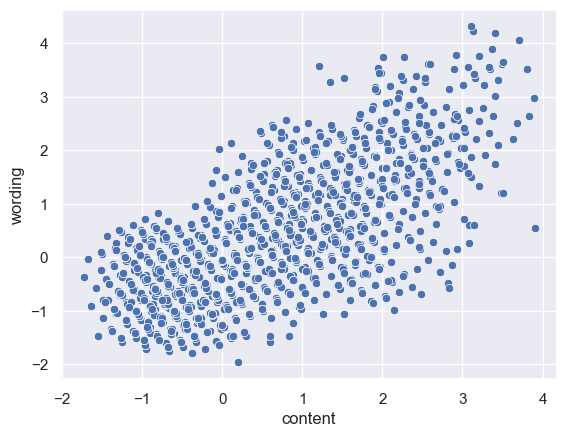

In [11]:
sns.scatterplot(x=summary_df["content"], y=summary_df["wording"])

In [12]:
summary_df[["content","wording"]].corr()

,content,wording
content,1.00000,0.75138
wording,0.75138,1.00000


In [13]:
# データの構成
summary_df[summary_df["student_id"]=="000e8c3c7ddb"]

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538


In [14]:
summary_df[summary_df["student_id"]=="000e8c3c7ddb"]["text"].values[0]

'The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader'

In [24]:
print(prompt_df[prompt_df["prompt_id"]=="814d6b"]["prompt_question"].values[0])
print("="*30)
print(prompt_df[prompt_df["prompt_id"] == "814d6b"]["prompt_title"].values[0])
print("="*30)
print(prompt_df[prompt_df["prompt_id"] == "814d6b"]["prompt_text"].values[0])

print("="*30)
print(summary_df[summary_df["student_id"]=="000e8c3c7ddb"]["text"].values[0])

Summarize how the Third Wave developed over such a short period of time and why the experiment was ended.
The Third Wave
Background 
The Third Wave experiment took place at Cubberley High School in Palo Alto, California during the first week of April 1967. History teacher Ron Jones, finding himself unable to explain to his students how people throughout history followed the crowd even when terrible things were happening, decided to demonstrate it to his students through an experiment. Jones announced that he was starting a movement aimed to eliminate democracy. Jones named the movement “The Third Wave” as a symbol of strength, referring to the mythical belief that the third in a series of waves is the strongest. One of the central points of this movement was that democracy’s main weakness is that it favors the individual over the whole community. Jones emphasized this main point of the movement when he created this catchy motto: “Strength through discipline, strength through community,